# Bullard Plot  
The Bullard plot method is used for calculating the specific heat flow in an area based on temperature data and the concept of *thermal resistance*.  
Thermal resistance (R in [m² K W$^{-1}$) is the integrated reciprocal of thermal conductivities over a depth range z, i.e. how effectively a layered sequence of rocks retards the flow of heat.  

$$ R = \int \frac{1}{\lambda} dz $$  

From Fouriers Law, we know:  
$$q = \lambda \bigg(\frac{\partial T}{\partial z}\bigg) $$

rearragning the equation yields:
$$q = \partial T \bigg(\frac{\lambda}{\partial z}\bigg) $$

this fraction is equal to 1/R:
$$q = \partial T \bigg(\frac{1}{\partial R}\bigg) $$

which then yields to:
$$q = \bigg(\frac{\partial T}{\partial R}\bigg) $$  

That means, the change in temperature with respect to the thermal resistance is equal to the specific heat flow.  
Now let's assume we have a layercake model with discrete layers of rocks. The thermal resistance can then be rewritten as:  

$$ R = \sum_i \bigg(\frac{\Delta z_i}{\lambda_i}\bigg) $$  

where $i$ is the number of layers in the sequence and $\Delta z$ the according layer-thickness.  

The idea of the Bullard-Plot is to plot the cumulative thermal resistances vs measured temperatures. They exhibit a linear relation. Using a linear regression, the obtained slope is equal to the specific heat flow.

## Small exercise / demonstration 
<img src='bullard_layer.png' style="float: right; width: 27%; margin-right: 3%; margin-bottom: 0.5em;">
Assume we have a borehole with a depth of 2.2 km. It penetrates multiple layers. The average surface temperature is 11 °C. At each layer boundary, temperatures were measured, as well as at the maximum depth of the borehole.  
So in total, we have 4 temperature measurements:  
* 22 °C @ 1 km depth  
* 30 °C @ 1.4 km depth  
* 41 °C @ 2 km depth  
* 47 °C @ 2.2 km depth  

In the following, we will calculate the cumulative thermal resistances and create a Bullard Plot.  
Cumulative thermal resistances mean for example, that at the bottom of the yellow layer, the actual thermal resistance is equal to the sum of the *yellow thermal resistance* and *orange thermal resistance*.


In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division, print_function

In [42]:
# set up arrays
z = np.array([1000, 400, 600, 200])
tc = np.array([3.2, 2.3, 1.6, 4.2])

T = np.array([10, 22, 30, 46, 49]) # here we also include the surface temperature


# cumulative thermal resistances
# We write out the resistances here manually to be better understandable, you could also do that in a loop!
r0 = 0                 # thermal resistance at the surface
r1 = z[0]/tc[0]
r2 = r1 + (z[1]/tc[1])
r3 = r2 + (z[2]/tc[2])
r4 = r3 + (z[3]/tc[3])

R = np.array([r0, r1, r2, r3, r4])

In [43]:
# get the linear regression using polyfit
m, b = np.polyfit(R,T,1)
# set up resistance vector 
R_reg = np.linspace(0,1200,1200)
# calculating temperature of resistance vector
T_reg = m * R_reg + b

print("The specific heat flow is about {} W/m²".format(round(m,4)))

The specific heat flow is about 0.0429 W/m²


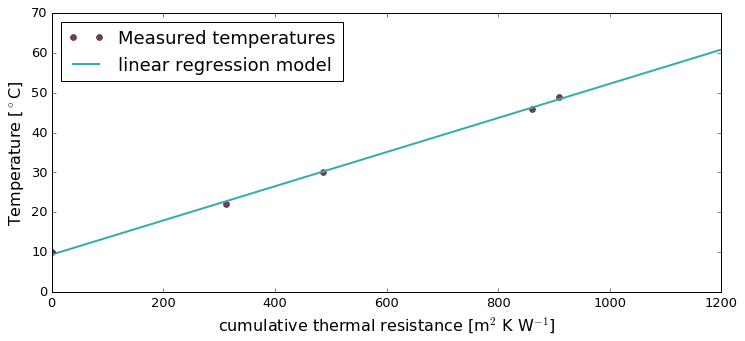

In [44]:
# plot the results
fig = plt.figure(figsize=(12,5))
dots, = plt.plot(R,T,'o', color='#660033', alpha=0.8)
line, = plt.plot(R_reg,T_reg, '-', linewidth=2, color='#33ADAD')
plt.xlabel('cumulative thermal resistance [m$^2$ K W$^{-1}$]', fontsize=16)
plt.ylabel('Temperature [$^\circ$C]', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.legend([dots,line], ["Measured temperatures", "linear regression model"], loc=2, fontsize=18)